# Requirement processing

In [ ]:
# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

# Data overlook

In [ ]:
df = pd.read_csv("/content/job_data.csv", encoding = 'latin_1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


# Data cleaning

In [ ]:
df.rename(columns={"Job Title":"Title", "Job Type":"Type", "Experience level":"level", 'Requirment of the company ':"Requirment"},inplace=True)

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True, ignore_index=True)

In [ ]:
df.shape

(2600, 8)

In [ ]:
df.isnull().sum()

Company       0
Title         0
Location      0
Type          0
level         0
Salary        0
Requirment    0
Facilities    0
dtype: int64

**Requirement cleaning**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stopwords.words("english")[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
df['Requirment'] = df['Requirment'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [ ]:
df['Requirment']

0       computer science data quality genetics mathema...
1                  agile data management finance security
2              engineering industrial oracle power bi r r
3       aws azure computer science consulting dataflow...
4       computer science deep learning industrial mach...
                              ...                        
2595            agile angular apis architecture aws azure
2596    bayesian classification clustering data analys...
2597    computer science data analysis engineering exc...
2598    apis clustering computer science data visualiz...
2599    computer science data analytics data mining ec...
Name: Requirment, Length: 2600, dtype: object

**Facilities cleaning**

In [ ]:
df['Facilities'] = df['Facilities'].apply(lambda x: preprocess_text(x, remove_stopwords=True))

In [ ]:
df['Facilities']

0                                                        
1                                                        
2                                                        
3       flex hours flex vacation parental leave unlimi...
4       k matching career development competitive pay ...
                              ...                        
2595    k matching career development flex hours flex ...
2596                       career development health care
2597    k matching career development equity insurance...
2598                                   career development
2599               career development startup environment
Name: Facilities, Length: 2600, dtype: object

**Salary cleaning**

In [ ]:
df['Salary'] = df['Salary'].str.extract(r'(\d+)').astype(int)

In [ ]:
df['Salary'] = df['Salary'].astype(int)

In [ ]:
df['Salary']

0        48
1        48
2        48
3       108
4       184
       ... 
2595    113
2596    106
2597    176
2598     39
2599     39
Name: Salary, Length: 2600, dtype: int64

**Experience cleaning**

In [ ]:
def renomer(column, x, y):
    column.replace(x,y, inplace=True)
    return column

In [ ]:
renomer(df.level, 'Senior-level', 'Senior' )
renomer(df.level, 'Mid-level', 'Intermediate')
renomer(df.level, 'Entry-level', 'Junior')
renomer(df.level, 'Executive-level', 'Director')

0             Junior
1             Junior
2             Junior
3       Intermediate
4             Senior
            ...     
2595    Intermediate
2596    Intermediate
2597          Senior
2598          Junior
2599          Junior
Name: level, Length: 2600, dtype: object

**Job title cleaning**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def clean_text(row_text, remove_stopwords=True):
    """This function sanitizes a text by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords (optional)
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        row_text (str): the text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """
    # Check if the input is a string or if it's NaN (not a string)
    if not isinstance(row_text, str):
        return row_text

    # remove links
    text = re.sub(r"http\S+", "", row_text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['Title'] = df['Title'].apply(clean_text)

In [ ]:
df['Title']

0                                   clinical data analyst
1                                    aml cft data analyst
2                      application developer data analyst
3               data engineer full time public sector usa
4                             sr staff data scientist atg
                              ...                        
2595    application integration engineer computer visi...
2596                      associate director data science
2597    senior software engineer machine learning ads ...
2598                  data scientist new college graduate
2599                                       data scientist
Name: Title, Length: 2600, dtype: object

In [ ]:
def process_description(description):
    words = description.split()
    filtered_words = [word for word in words if len(word) > 3 and word not in ['bi', 'ai']]
    return ' '.join(filtered_words)

In [ ]:
df['Title'] = df['Title'].apply(process_description)

In [ ]:
df['Title'] = df['Title'].str.replace('senior ', '').str.strip()

In [ ]:
df['Title'] = df['Title'].str.replace('junior ', '').str.strip()

In [ ]:
df['Title'] = df['Title'].str.replace('lead ', '').str.strip()

In [ ]:
df['Title'] = df['Title'].str.replace('director ', '').str.strip()

In [ ]:
df['Title'] = df['Title'].str.replace('staff ', '').str.strip()

In [ ]:
df['Title'] = df['Title'].str.replace('engineering', 'engineer').str.strip()

In [ ]:
df['Title'] = df['Title'].str.replace('remote ', '').str.strip()

In [ ]:
df['Title']

0                                   clinical data analyst
1                                            data analyst
2                      application developer data analyst
3                   data engineer full time public sector
4                                          data scientist
                              ...                        
2595    application integration engineer computer visi...
2596                               associate data science
2597      software engineer machine learning intelligence
2598                      data scientist college graduate
2599                                       data scientist
Name: Title, Length: 2600, dtype: object

**Location cleaning**

In [ ]:
for local in df['Location']:
  print(local)

Richardson, TX, United States
Ebène, Mauritius
Nonantola, Italy
Arlington, VA, United States
Kirkland, Washington, United States
Porto, Portugal
Santa Clara, CA, United States
Geneva, Switzerland
Mumbai, India
Braga, Portugal
Gerlingen, Germany
Kirkland, Washington, United States
United States, Aliso Viejo, CA
Sydney, New South Wales, Australia
Remote job
Tallinn
Bengaluru, India
Málaga, Spain
Plymouth, MI, United States
Remote Worldwide
Houston, TX, United States
Saint-Herblain, France
New York City, United States
Mexico City, Mexico
São Paulo, State of São Paulo, Brazil 
Poland or Eastern Europe remote
Batu Kawan, Malaysia
Lehi, Utah, Open to Remote
Barcelona, Spain
Los Angeles, CA
Wroclaw, PL
Buenos Aires, Buenos Aires, Argentina - Remote
United States - Remote
Bengaluru, India
Brussels, Germany
Argentina
Boston, Massachusetts, United States
Remote
United States
Remote job
Brussels, Brussels, Belgium - Remote
Gurgaon, India
Remote
Lehi, Utah, United States
Cardiff, London or Remote

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

2023-07-30 11:07:12.465880: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 11:07:14.265028: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 36.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

# Load the 'en_core_web_sm' model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def extract_countries(text):
    doc = nlp(text)
    countries = []
    for ent in doc.ents:
        if ent.label_ == "GPE":  # GPE: Geopolitical Entity (countries, cities, states, etc.)
            countries.append(ent.text)
    return countries

In [ ]:
df['Country'] = df['Location'].apply(extract_countries)

In [ ]:
def get_last_element(input_list):
    if not input_list:
        return None  # Return None for an empty list
    return input_list[-1]

In [ ]:
df['Country'] = df['Country'].apply(get_last_element)

In [ ]:
for pays in df['Country']:
  print(pays)

United States
None
Italy
United States
United States
Portugal
United States
Switzerland
India
Portugal
Germany
United States
United States
Australia
None
None
India
Spain
United States
None
United States
France
United States
Mexico
Brazil
Poland
Malaysia
Utah
Spain
Los Angeles
None
None
United States - Remote
India
Germany
Argentina
United States
None
United States
None
Brussels
India
None
United States
UK
San Francisco
United States - Remote
United Kingdom
None
Brazil
United Kingdom
Oldsmar
United States
None
United States
United States - Remote
India
United States
Ukraine
United States - Remote
United Kingdom
USA
United Kingdom
United States
United States
Canada
United Arab Emirates
Australia
New York
United States
Germany
Ontario
South Africa - Remote
Costa Rica
United States
England
United States - Remote
United States
Costa Rica
Los Angeles
France
United States
Belgium
Menlo Park
Belgium
United States
United States
Canada
India
United States
US
None
Newark
USA
Germany
Lithuania
So

In [ ]:
df['Country'].replace('USA', 'United States', inplace=True)

In [ ]:
df['Country'].replace('San Francisco', 'United States', inplace=True)
df['Country'].replace('United States - Remote', 'United States', inplace=True)

In [ ]:
df['Country'].replace('Bangkok','Thailand', inplace=True)
df['Country'].replace('New York City', 'United States', inplace=True)
df['Country'].replace('US', 'United States', inplace=True)
df['Country'].replace('United Kingdom - Remote', 'United Kingdom', inplace=True)

In [ ]:
df['Country'].replace('UK', 'United Kingdom', inplace=True)
df['Country'].replace('California', 'United States', inplace=True)

In [ ]:
df['Country'].replace('London', 'United Kingdom', inplace=True)

In [ ]:
df['Country'].replace('VA', 'United States', inplace=True)
df['Country'].replace('WA', 'United States', inplace=True)
df['Country'].replace('Chicago', 'United States', inplace=True)

In [ ]:
df['Country'].replace('MA', 'United States', inplace=True)

In [ ]:
df['Country'].replace('Los Angeles', 'United States', inplace=True)

In [ ]:
df['Country'].replace('Pune, India', 'India', inplace=True)

In [ ]:
df['Country'].value_counts().head(30)

United States     732
United Kingdom    204
India             188
France             99
Germany            86
Canada             82
Australia          45
Poland             39
Thailand           36
Brazil             35
Portugal           32
Spain              30
Mexico             27
South Africa       24
Malaysia           23
Netherlands        20
Israel             20
Singapore          19
Costa Rica         18
Greece             17
Belgium            14
Philippines        14
Ireland            13
Sweden             13
Vietnam            13
South Korea        12
Switzerland        12
Colombia           10
Hungary            10
Romania             9
Name: Country, dtype: int64

# Searching for classes

In [ ]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['Requirment'])

In [ ]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
# assign clusters and pca vectors to our dataframe
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [ ]:
df

,Company,Title,Location,Type,level,Salary,Requirment,Facilities,Country,cluster,x0,x1
0,SGS,clinical data analyst,"Richardson, TX, United States",Full Time,Junior,48,computer science data quality genetics mathema...,,United States,2,0.096575,0.077781
1,Ocorian,data analyst,"Ebène, Mauritius",Full Time,Junior,48,agile data management finance security,,None,2,-0.008168,0.143837
2,Bosch Group,application developer data analyst,"Nonantola, Italy",Full Time,Junior,48,engineering industrial oracle power bi r r,,Italy,2,0.212054,0.104518
3,Publicis Groupe,data engineer full time public sector,"Arlington, VA, United States",Full Time,Intermediate,108,aws azure computer science consulting dataflow...,flex hours flex vacation parental leave unlimi...,United States,1,-0.173533,-0.186278
4,ServiceNow,data scientist,"Kirkland, Washington, United States",Full Time,Senior,184,computer science deep learning industrial mach...,k matching career development competitive pay ...,United States,0,0.403370,-0.192080
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,CCRi,application integration engineer computer visi...,"Chantilly, Virginia, United States",Full Time,Intermediate,113,agile angular apis architecture aws azure,k matching career development flex hours flex ...,United States,1,-0.247856,-0.327857
2596,Publicis Groupe,associate data science,"New York City, United States",Full Time,Intermediate,106,bayesian classification clustering data analys...,career development health care,United States,0,0.238787,0.020648
2597,DoorDash,software engineer machine learning intelligence,"Sunnyvale, CA; San Francisco, CA; New York",Full Time,Senior,176,computer science data analysis engineering exc...,k matching career development equity insurance...,New York,2,0.134893,0.079257
2598,Western Digital,data scientist college graduate,"Biñan, Philippines",Full Time,Junior,39,apis clustering computer science data visualiz...,career development,Philippines,0,0.139047,-0.149278


In [ ]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score

get_top_keywords(10)


Cluster 0
models,ml,vision,data,science,computer,engineering,deep,machine,learning

Cluster 1
airflow,apis,science,computer,agile,big,architecture,azure,data,aws

Cluster 2
visualization,science,computer,intelligence,analytics,business,excel,analysis,engineering,data


In [ ]:
# map clusters to appropriate labels
cluster_map = {0: "Machine Learning and Computer Vision", 1: "Cloud Computing and Data Science", 2: "Data Visualization and Business Analytics"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

In [ ]:
df

,Company,Title,Location,Type,level,Salary,Requirment,Facilities,Country,cluster,x0,x1
0,SGS,clinical data analyst,"Richardson, TX, United States",Full Time,Junior,48,computer science data quality genetics mathema...,,United States,Data Visualization and Business Analytics,0.096575,0.077781
1,Ocorian,data analyst,"Ebène, Mauritius",Full Time,Junior,48,agile data management finance security,,None,Data Visualization and Business Analytics,-0.008168,0.143837
2,Bosch Group,application developer data analyst,"Nonantola, Italy",Full Time,Junior,48,engineering industrial oracle power bi r r,,Italy,Data Visualization and Business Analytics,0.212054,0.104518
3,Publicis Groupe,data engineer full time public sector,"Arlington, VA, United States",Full Time,Intermediate,108,aws azure computer science consulting dataflow...,flex hours flex vacation parental leave unlimi...,United States,Cloud Computing and Data Science,-0.173533,-0.186278
4,ServiceNow,data scientist,"Kirkland, Washington, United States",Full Time,Senior,184,computer science deep learning industrial mach...,k matching career development competitive pay ...,United States,Machine Learning and Computer Vision,0.403370,-0.192080
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,CCRi,application integration engineer computer visi...,"Chantilly, Virginia, United States",Full Time,Intermediate,113,agile angular apis architecture aws azure,k matching career development flex hours flex ...,United States,Cloud Computing and Data Science,-0.247856,-0.327857
2596,Publicis Groupe,associate data science,"New York City, United States",Full Time,Intermediate,106,bayesian classification clustering data analys...,career development health care,United States,Machine Learning and Computer Vision,0.238787,0.020648
2597,DoorDash,software engineer machine learning intelligence,"Sunnyvale, CA; San Francisco, CA; New York",Full Time,Senior,176,computer science data analysis engineering exc...,k matching career development equity insurance...,New York,Data Visualization and Business Analytics,0.134893,0.079257
2598,Western Digital,data scientist college graduate,"Biñan, Philippines",Full Time,Junior,39,apis clustering computer science data visualiz...,career development,Philippines,Machine Learning and Computer Vision,0.139047,-0.149278


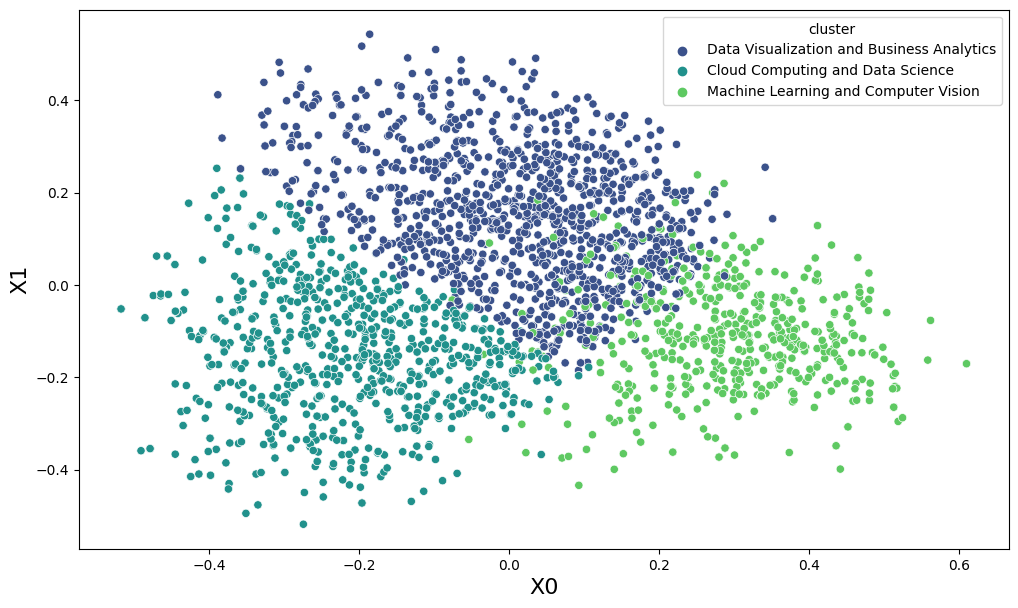

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

# Data processing

In [ ]:
df['classe'] = df['cluster']

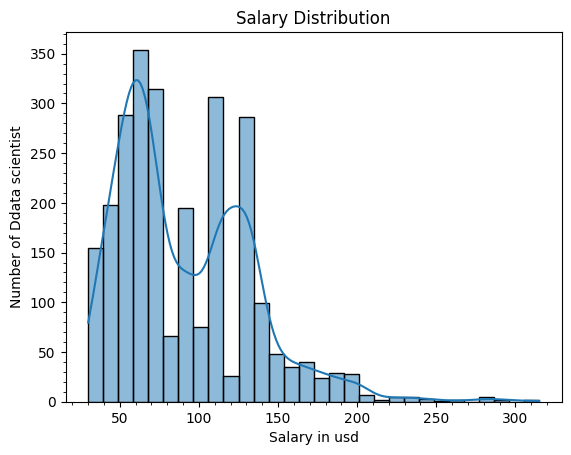

In [ ]:
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in usd')
plt.ylabel('Number of Ddata scientist')
plt.minorticks_on()

<Axes: >

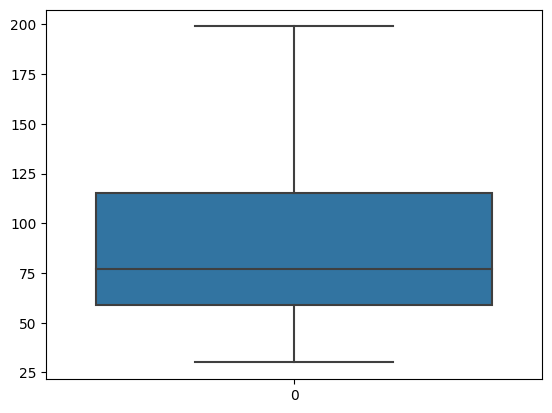

In [ ]:
sns.boxplot(df['Salary'], showfliers=False)

In [ ]:
import plotly.express as px
px.histogram(df, x='Salary', marginal='rug', title='<b> Salary Distribution')

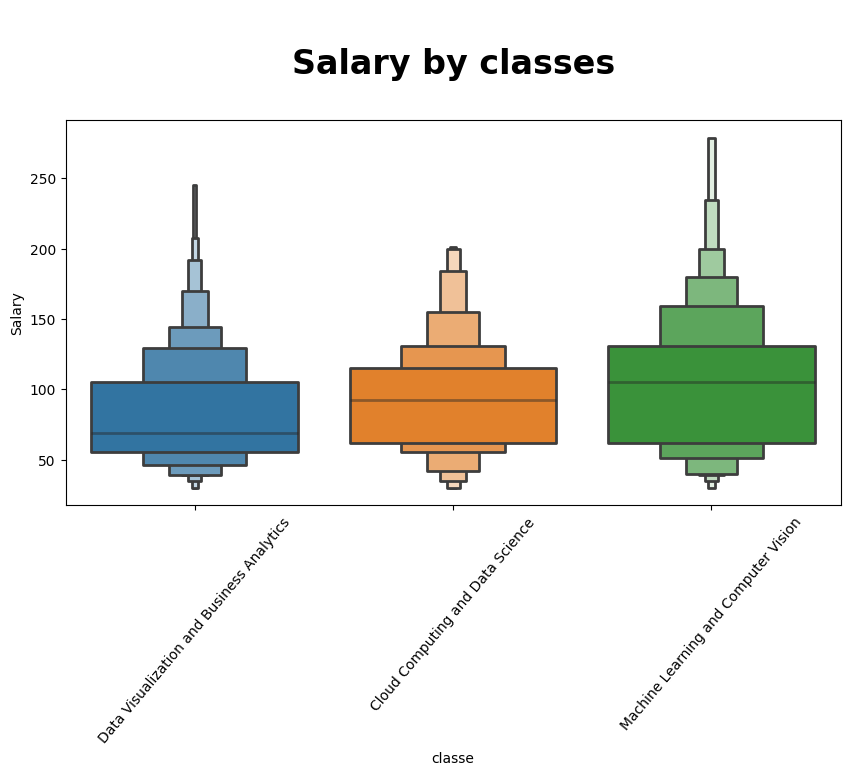

In [ ]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, y='Salary', x='classe', showfliers=False, linewidth=2)
plt.title('\nSalary by classes\n', fontsize=24, fontweight='bold')
plt.xticks(rotation=50)
plt.show()

In [ ]:
counts = df.level.value_counts()
counts

Senior          1701
Intermediate     433
Junior           349
Director         117
Name: level, dtype: int64

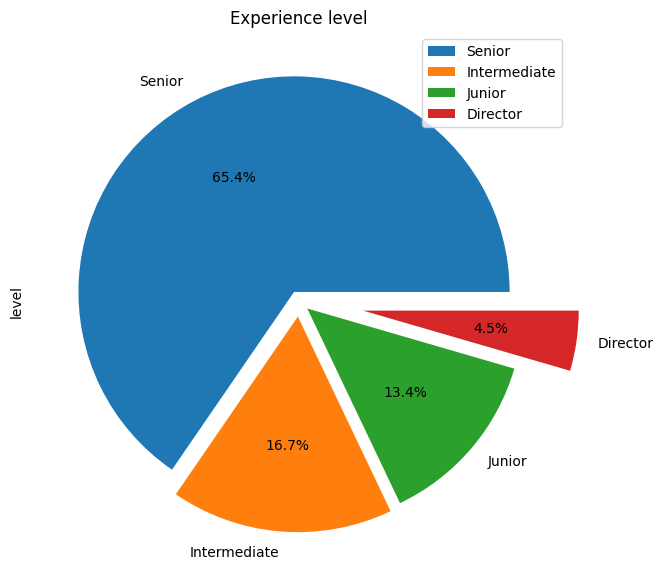

In [ ]:
order = ['Junior', 'Mid-level', 'Senior-level', 'Executive-level']
plt.figure(figsize=(10,7))
counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0.07, 0.05, 0.3])
plt.title('Experience level')
plt.legend(counts.index, loc='upper right', fontsize=10)

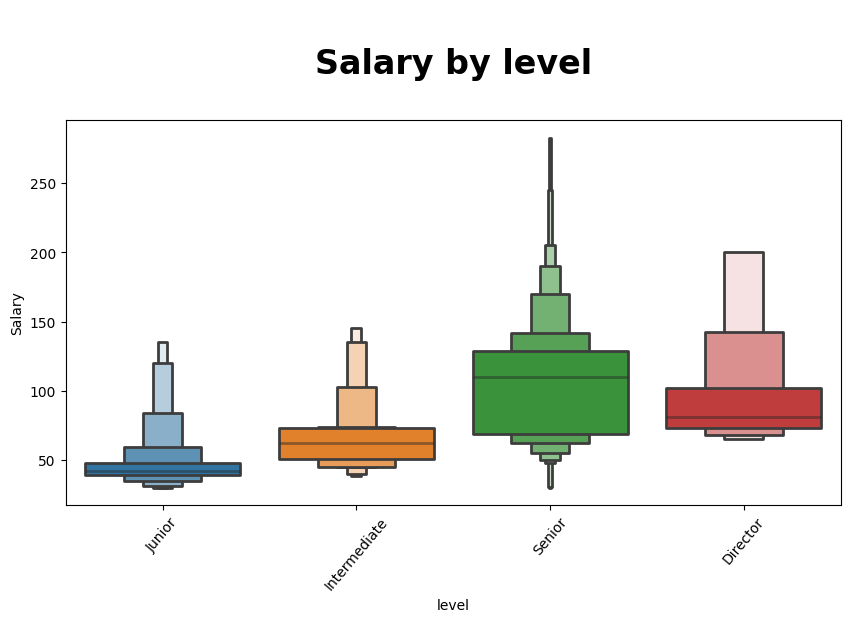

In [ ]:
plt.figure(figsize=(10,5))
sns.boxenplot(data=df, y='Salary', x='level', showfliers=False, linewidth=2)
plt.title('\nSalary by level\n', fontsize=24, fontweight='bold')
plt.xticks(rotation=50)
plt.show()

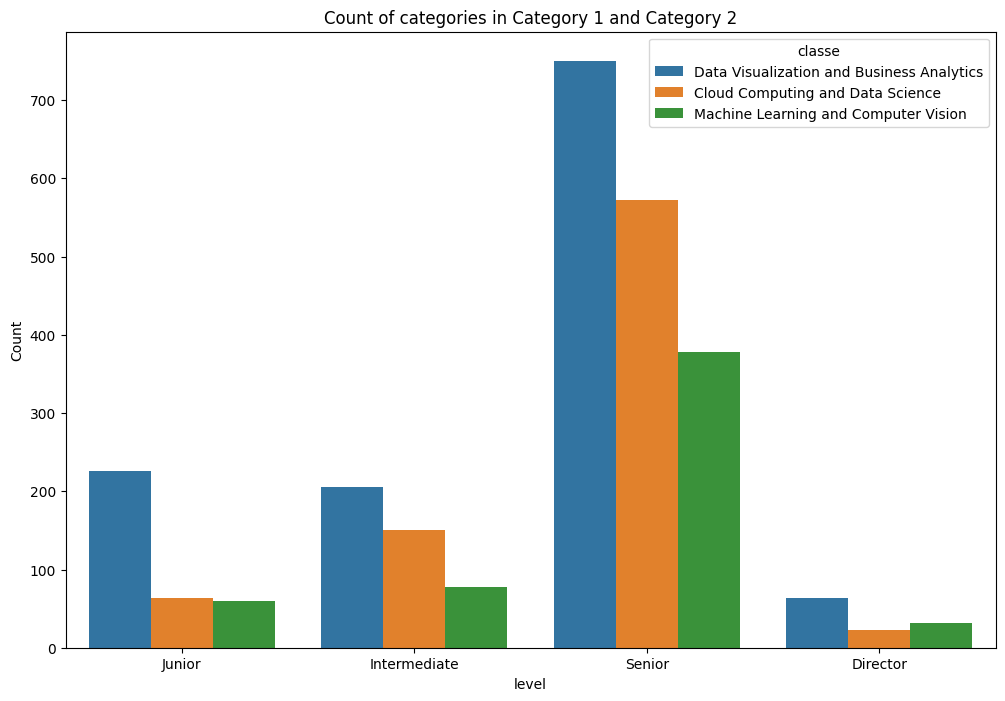

In [ ]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Use countplot to visualize the data
sns.countplot(x='level', hue='classe', data=df)

# Set labels and title
plt.xlabel('level')
plt.ylabel('Count')
plt.title('Count of categories in Category 1 and Category 2')

# Show the plot
plt.show()

<Axes: >

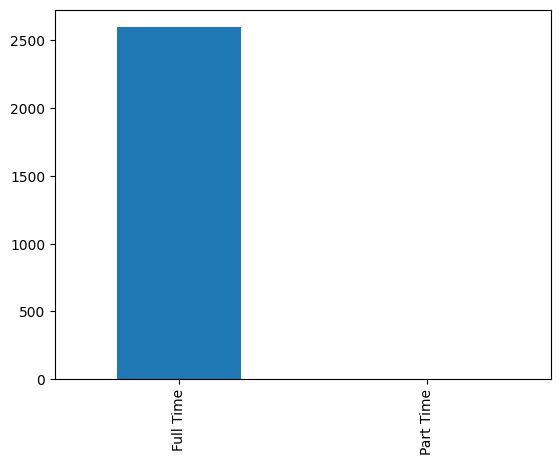

In [ ]:
df.Type.value_counts().plot(kind='bar')

In [ ]:
df.classe.unique()

array(['Data Visualization and Business Analytics',
       'Cloud Computing and Data Science',
       'Machine Learning and Computer Vision'], dtype=object)

In [ ]:
df2 = df[df['classe'] == 'Data Visualization and Business Analytics']

In [ ]:
df2['Title'].value_counts().head(10)

data analyst                      131
data scientist                     61
data engineer                      52
business intelligence analyst      20
analytics engineer                 19
data architect                      9
analyst                             8
machine learning engineer           8
business intelligence engineer      7
developer                           7
Name: Title, dtype: int64

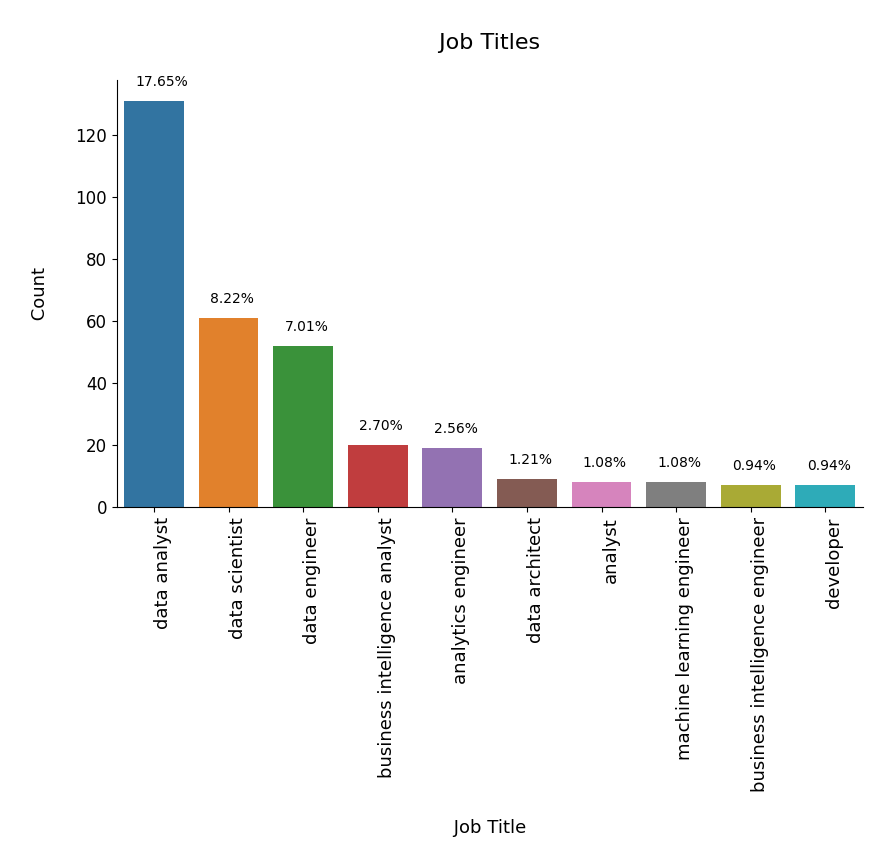

In [ ]:
# Looking at the most in demand job titles.
catp = sns.catplot(x="Title",data=df2,order=df2['Title'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df2['Title'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

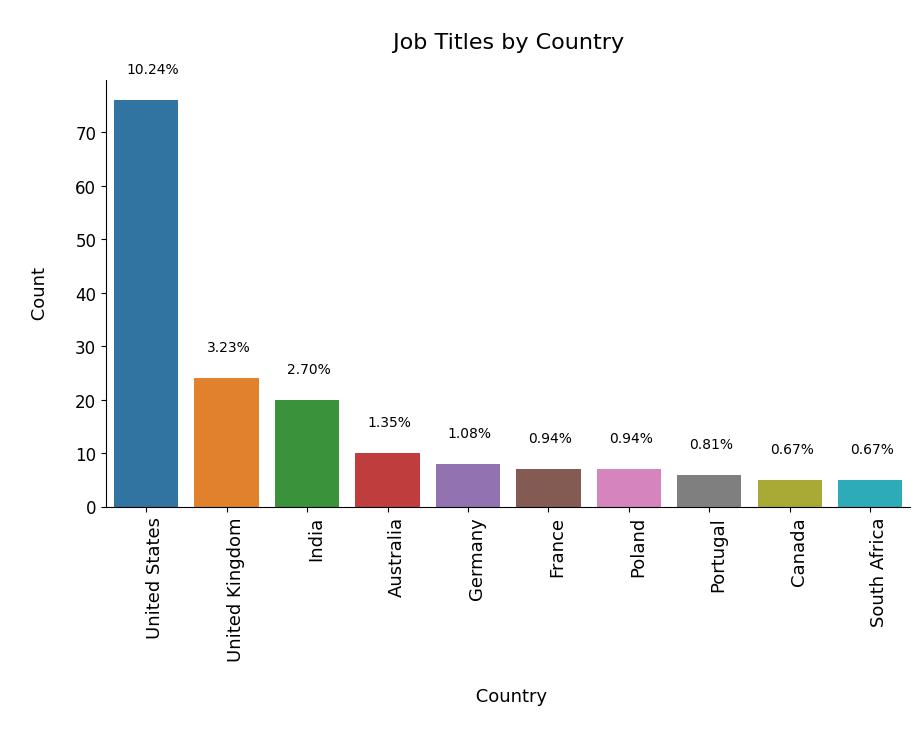

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Country",data=filtered_df,order=filtered_df['Country'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Country'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Country\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

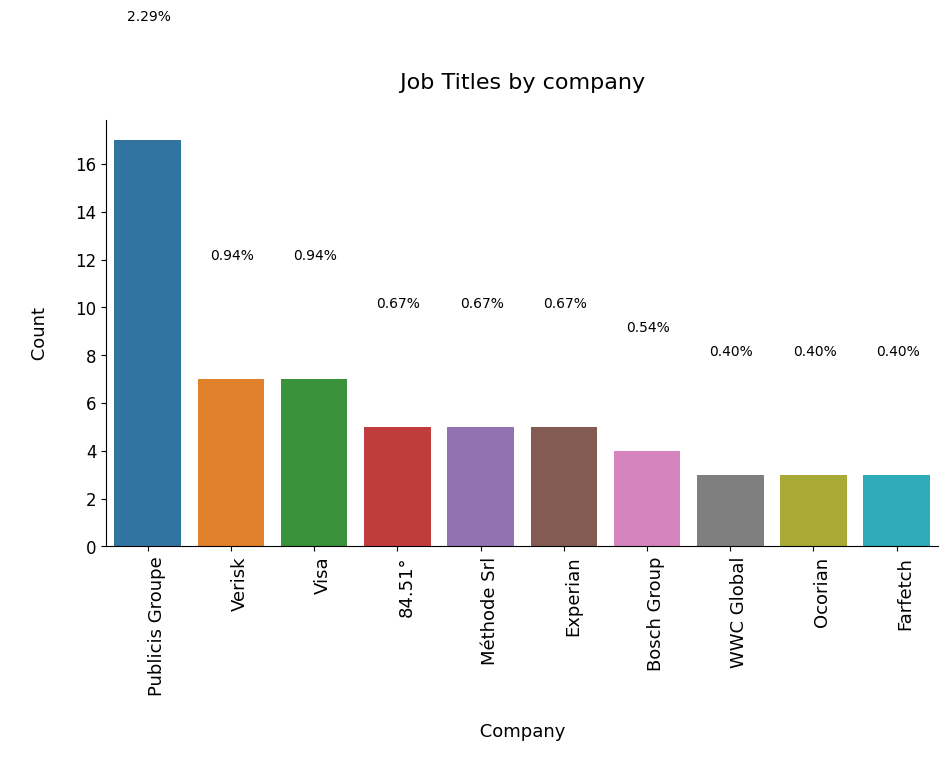

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Company",data=filtered_df,order=filtered_df['Company'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Company'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by company \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Company \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

In [ ]:
df2.columns

Index(['Company', 'Title', 'Location', 'Type', 'level', 'Salary', 'Requirment',
       'Facilities', 'Country', 'cluster', 'x0', 'x1', 'classe'],
      dtype='object')

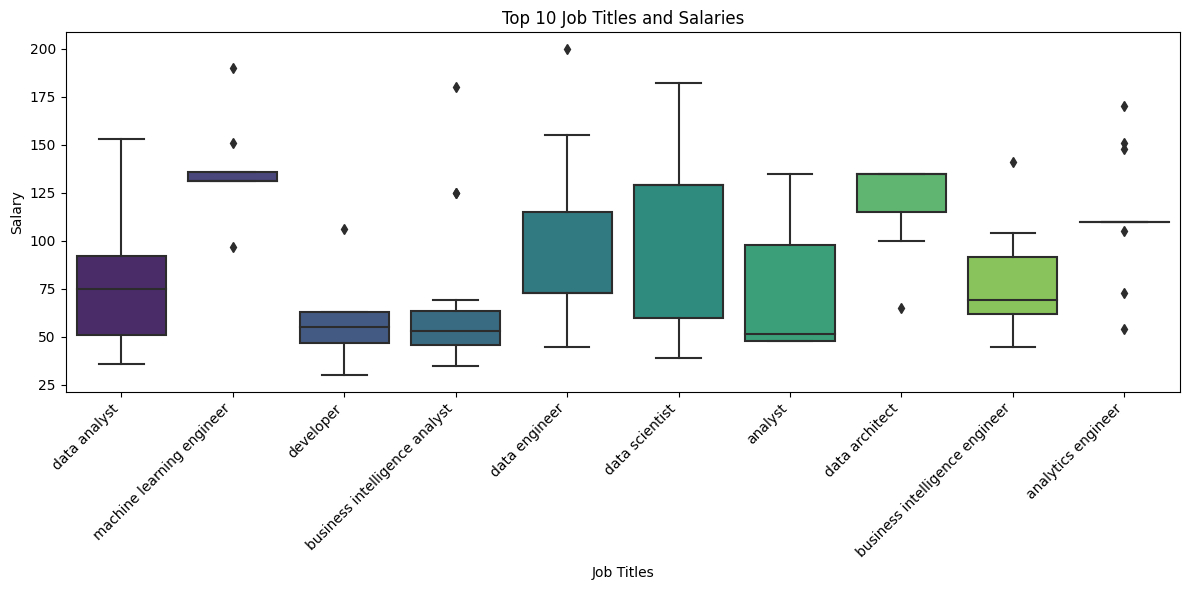

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=filtered_df, palette='viridis')
plt.xlabel('Job Titles')
plt.ylabel('Salary')
plt.title('Top 10 Job Titles and Salaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

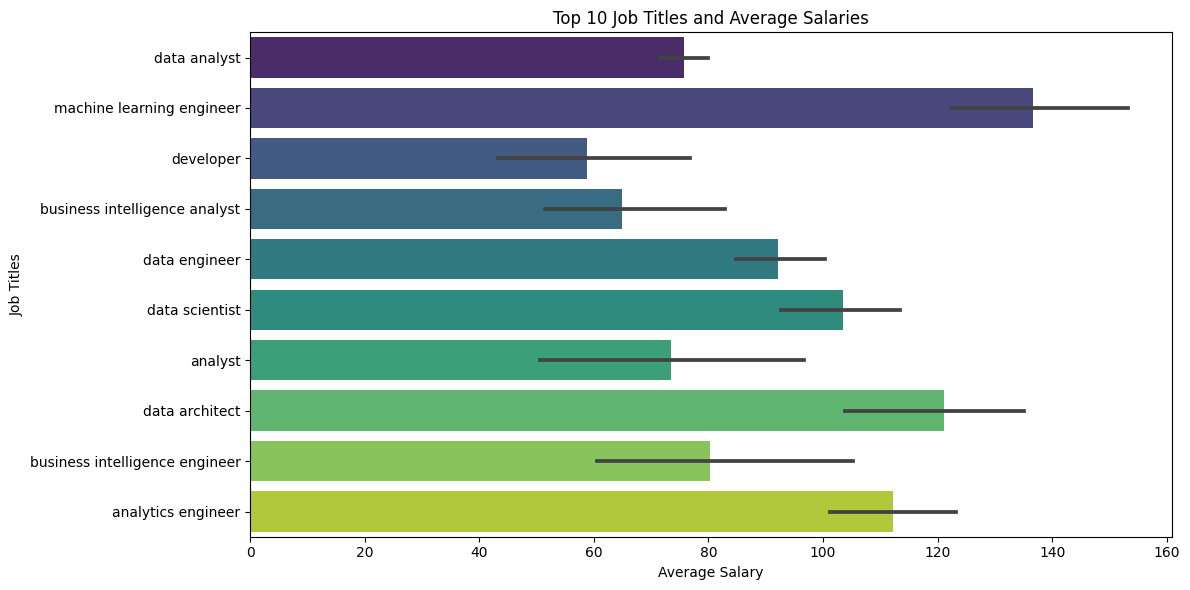

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary', y='Title', data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.show()

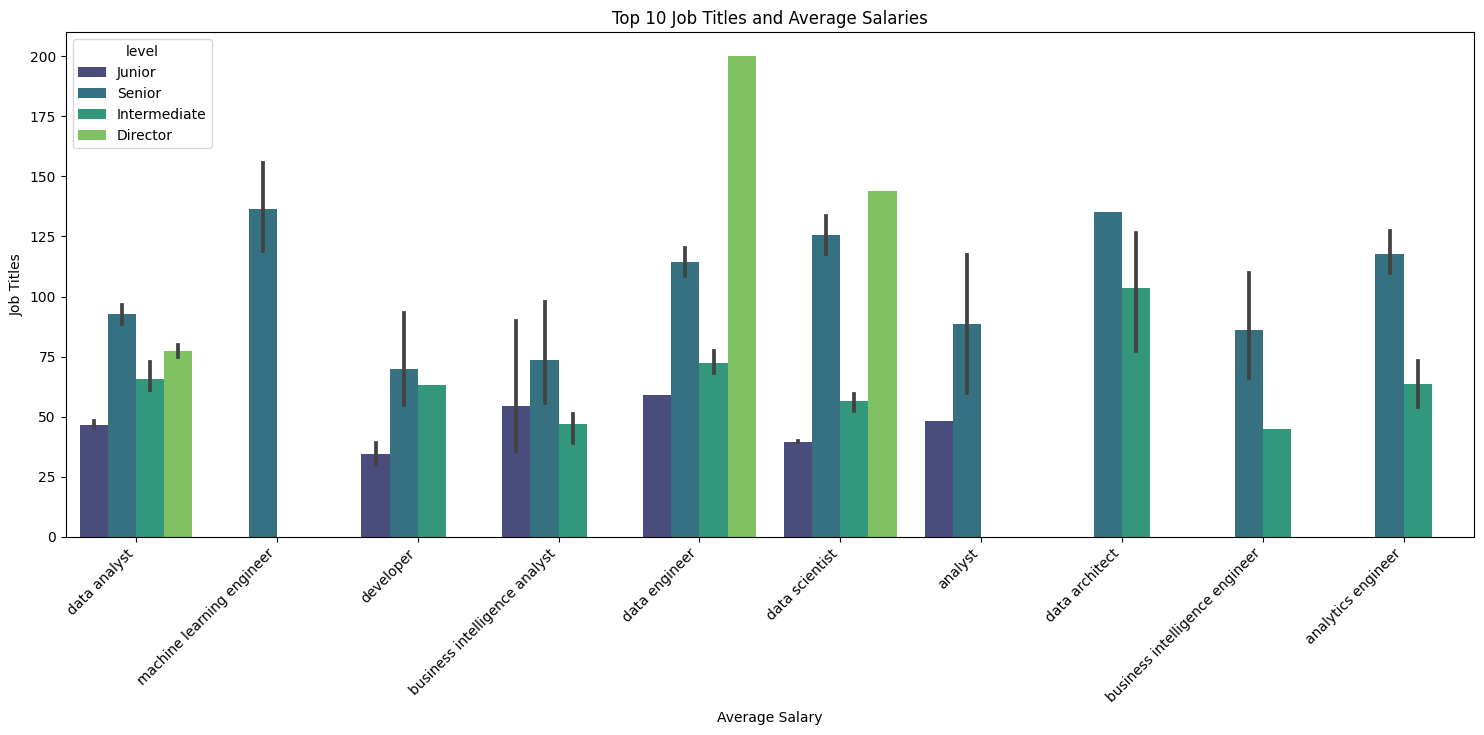

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df2['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df2[df2['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Title', y='Salary', hue='level',  data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df.columns

Index(['Company', 'Title', 'Location', 'Type', 'level', 'Salary', 'Requirment',
       'Facilities', 'Country', 'cluster', 'x0', 'x1', 'classe'],
      dtype='object')

In [ ]:
df3 = df[df['classe'] == 'Cloud Computing and Data Science']

In [ ]:
df3['Title'].value_counts().head(10)

data engineer                190
machine learning engineer     34
data scientist                29
data analyst                  11
data architect                11
analytics engineer            10
data engineer remote           9
manager data engineer          8
associate data engineer        5
engineer                       5
Name: Title, dtype: int64

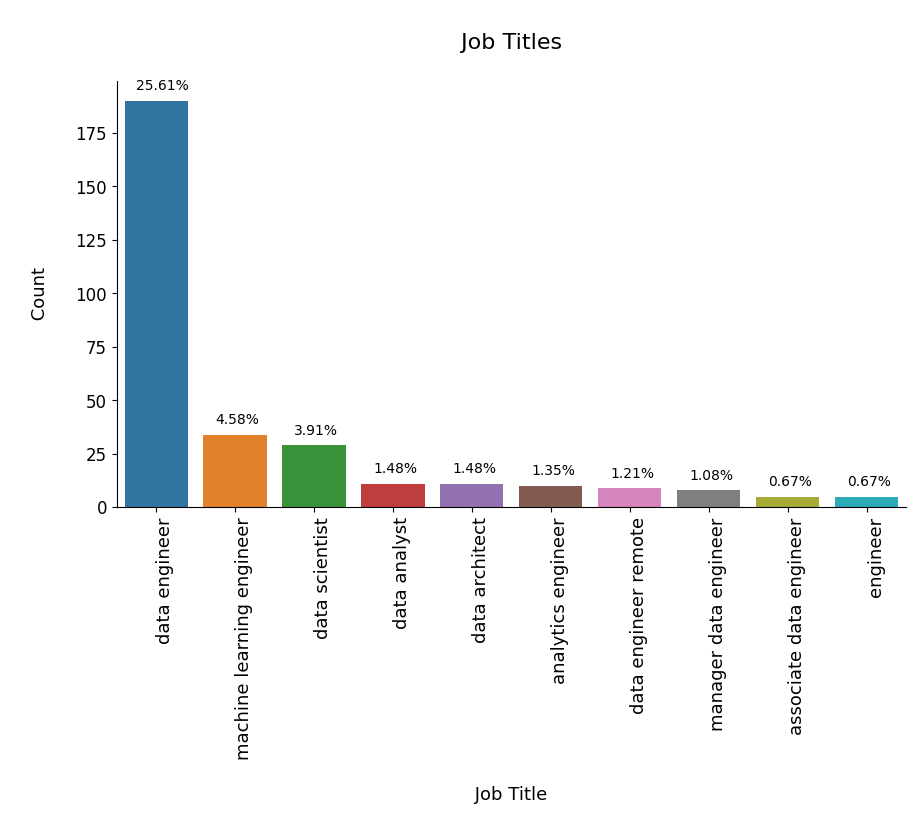

In [ ]:
# Looking at the most in demand job titles.
catp = sns.catplot(x="Title",data=df3,order=df3['Title'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df3['Title'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

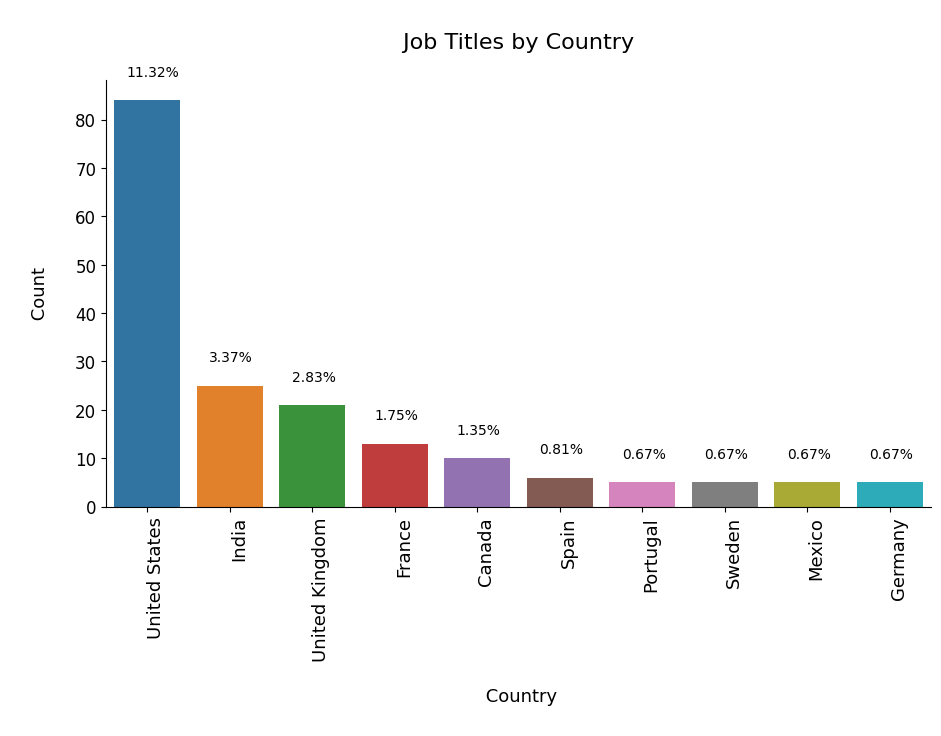

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Country",data=filtered_df,order=filtered_df['Country'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Country'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Country\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

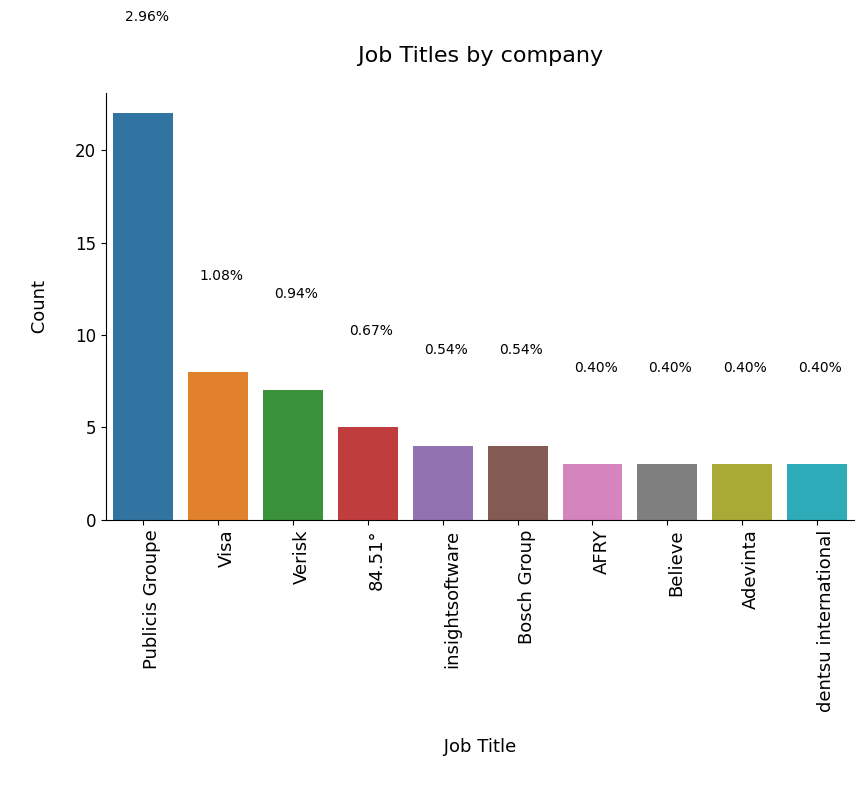

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Company",data=filtered_df,order=filtered_df['Company'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Company'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by company \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

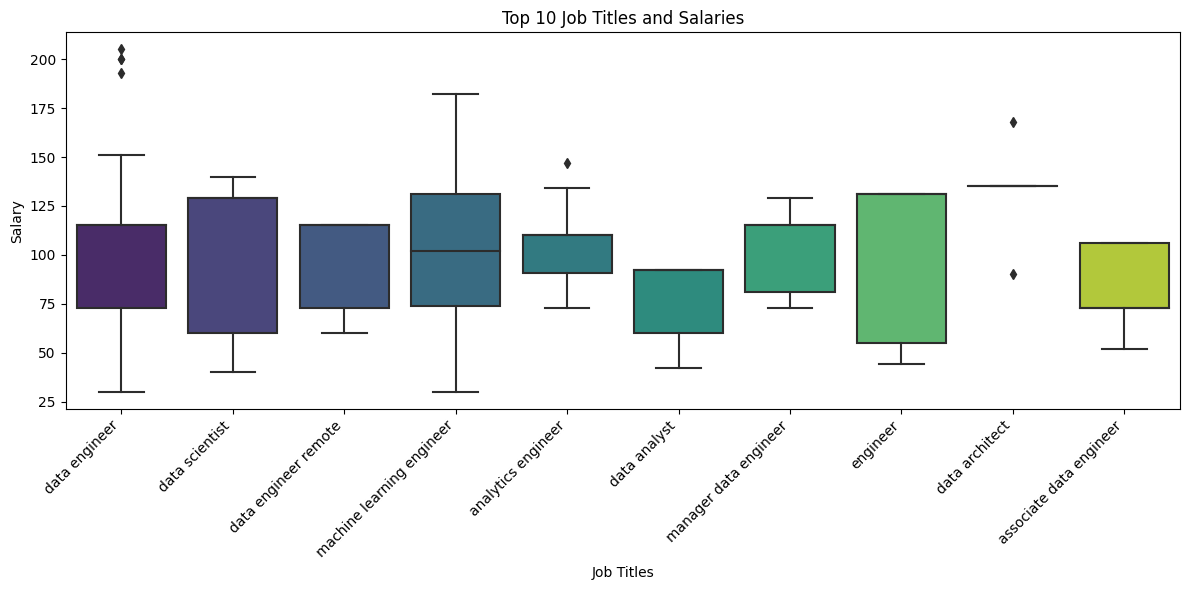

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=filtered_df, palette='viridis')
plt.xlabel('Job Titles')
plt.ylabel('Salary')
plt.title('Top 10 Job Titles and Salaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

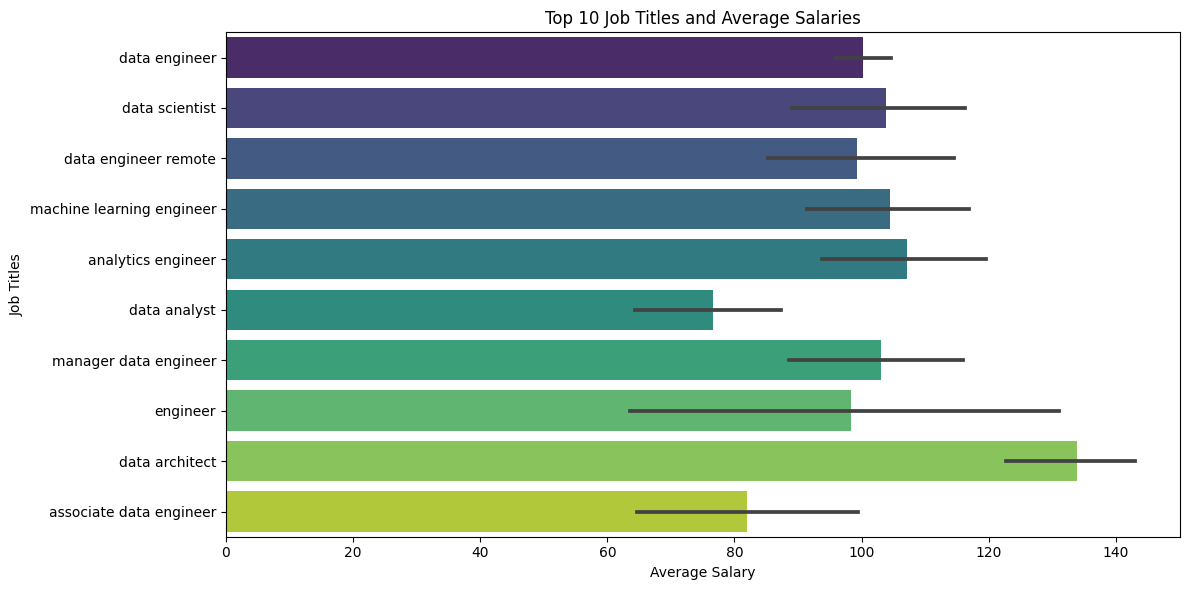

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary', y='Title', data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.show()

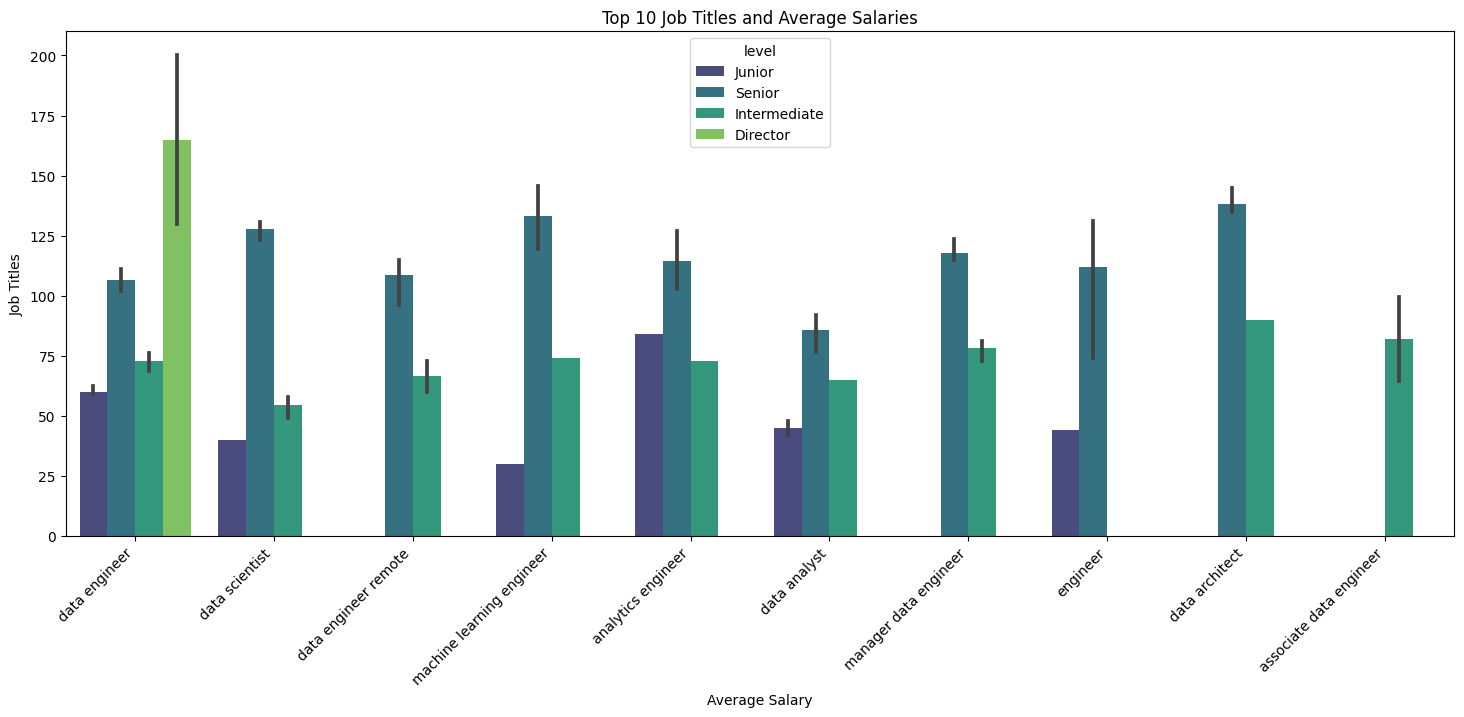

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df3['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df3[df3['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Title', y='Salary', hue='level',  data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df4 = df[df['classe'] == 'Machine Learning and Computer Vision']

In [ ]:
df4['Title'].value_counts().head(10)

data scientist                         62
machine learning engineer              40
research scientist                      9
machine learning scientist              9
engineer                                9
software engineer machine learning      7
data analyst                            6
principal machine learning engineer     6
data engineer                           5
applied scientist                       5
Name: Title, dtype: int64

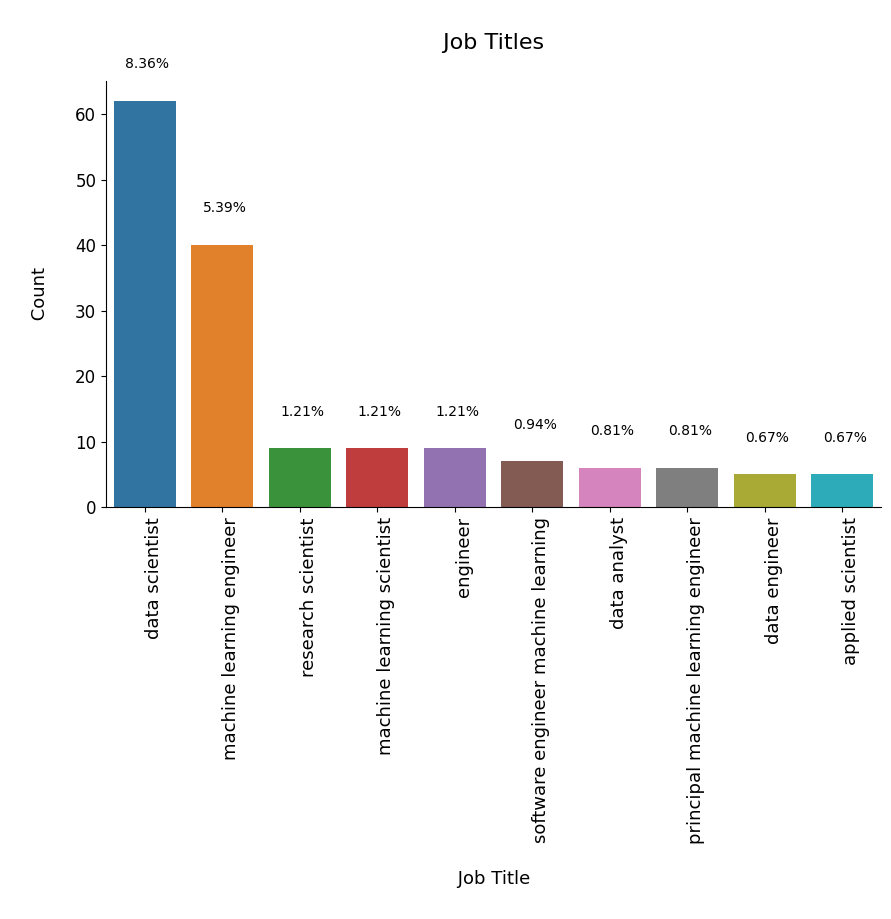

In [ ]:
# Looking at the most in demand job titles.
catp = sns.catplot(x="Title",data=df4,order=df4['Title'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = df4['Title'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Job Title \n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

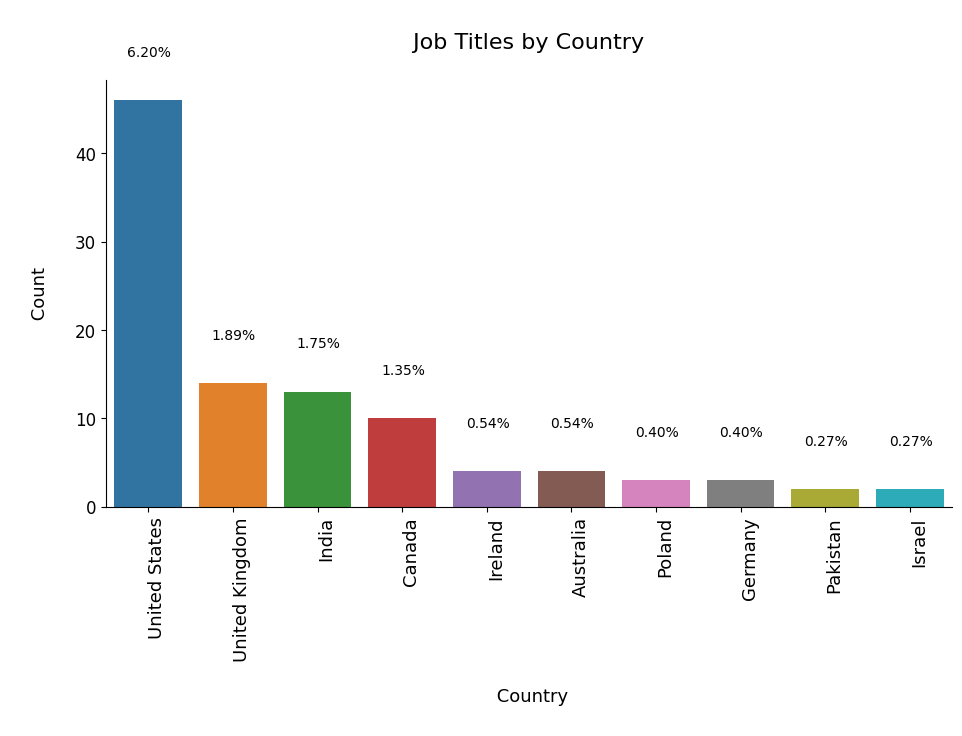

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Country",data=filtered_df,order=filtered_df['Country'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Country'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Country\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

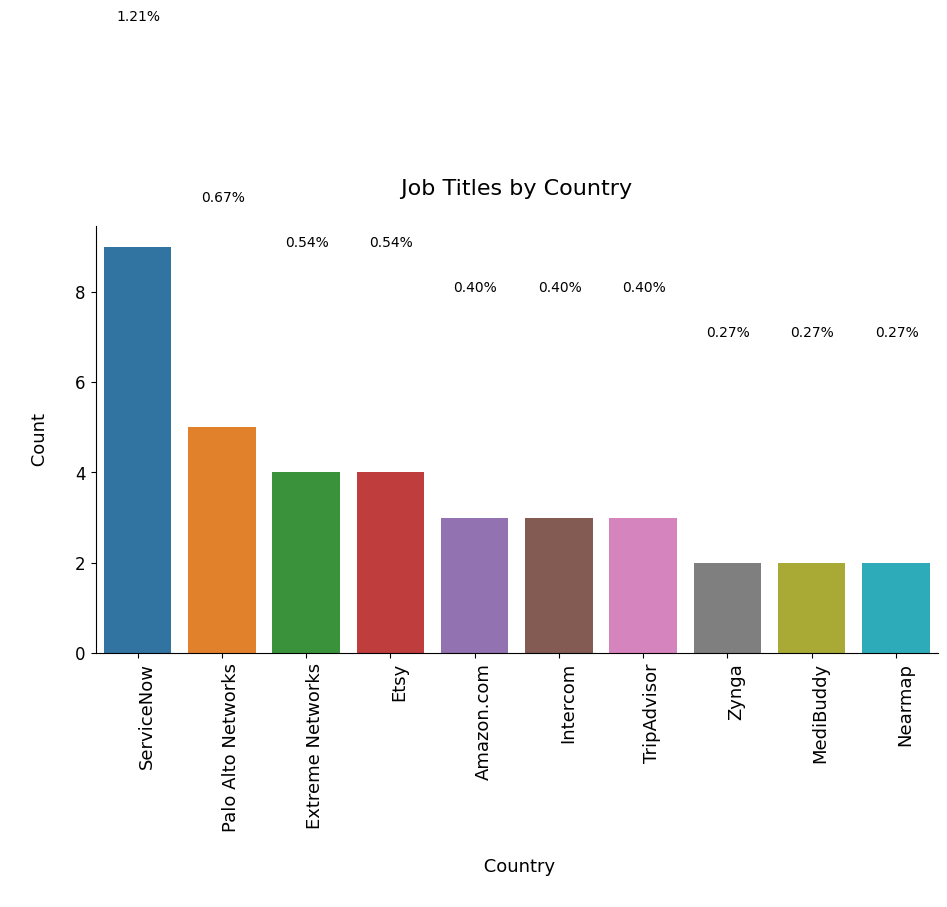

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Looking at the most in demand job titles.
catp = sns.catplot(x="Company",data=filtered_df,order=filtered_df['Company'].value_counts().head(10).index,kind="count")
catp.fig.set_size_inches(10,5)

#Putting % on the bar plot. Credit: Stackoverflow

spots = filtered_df['Company'].head(10).value_counts().index
ax = catp.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height()+5, '{:.2f}%'.format((p.get_height()/742)*100))

plt.title('\n Job Titles by Country \n', size=16, color='black')
plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Country\n', fontsize=13, color='black')
plt.ylabel('\n Count \n', fontsize=13, color='black')
plt.show()

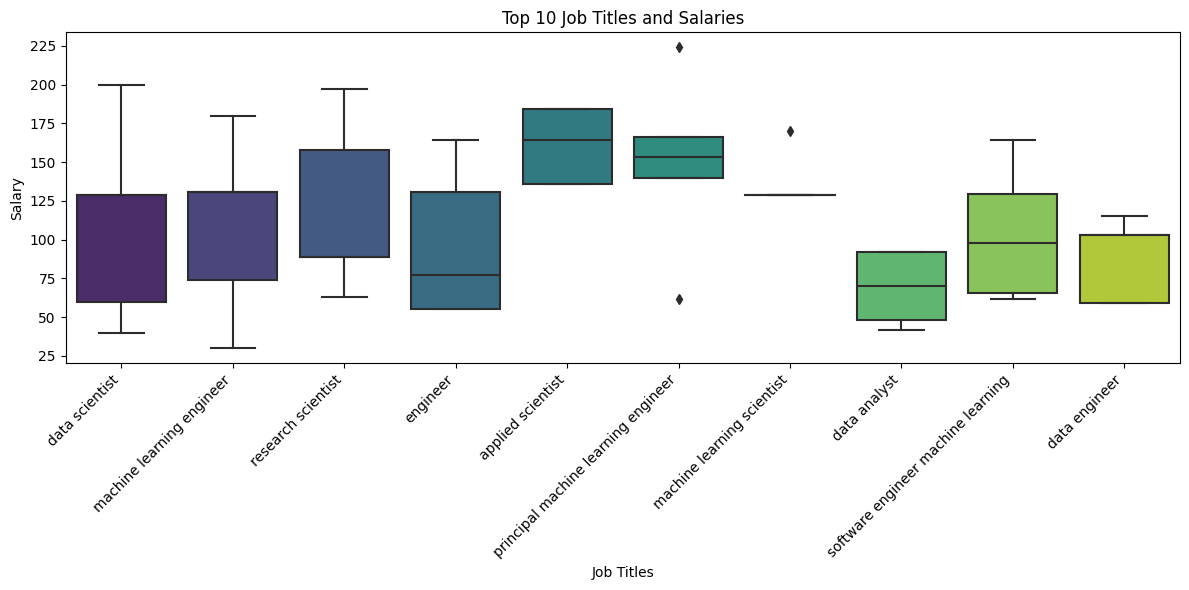

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Title', y='Salary', data=filtered_df, palette='viridis')
plt.xlabel('Job Titles')
plt.ylabel('Salary')
plt.title('Top 10 Job Titles and Salaries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

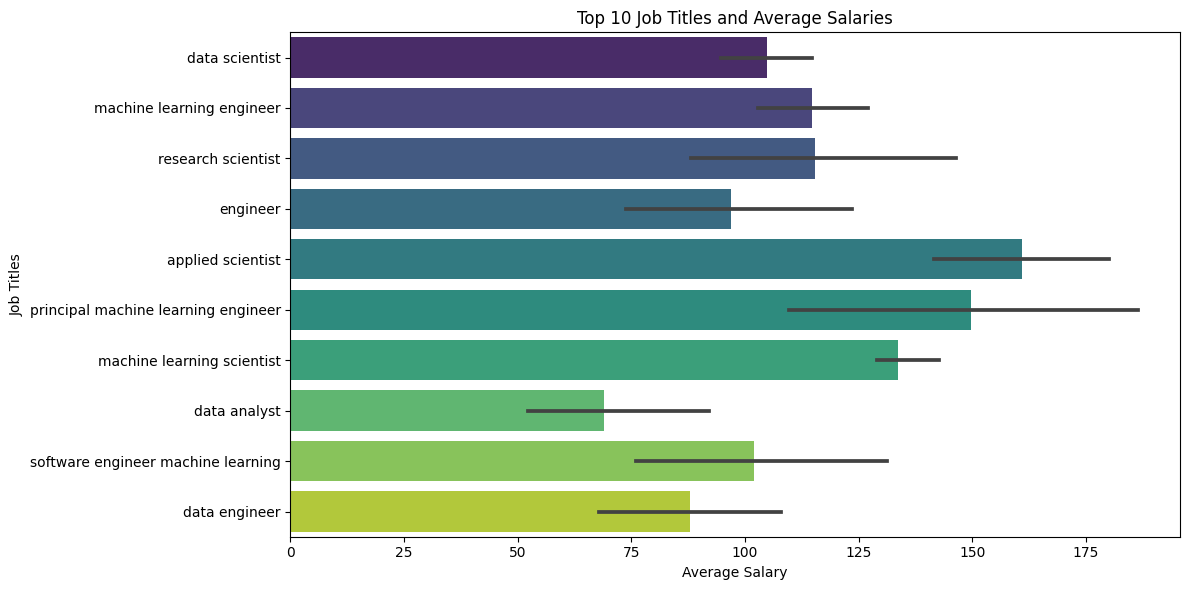

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary', y='Title', data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.show()

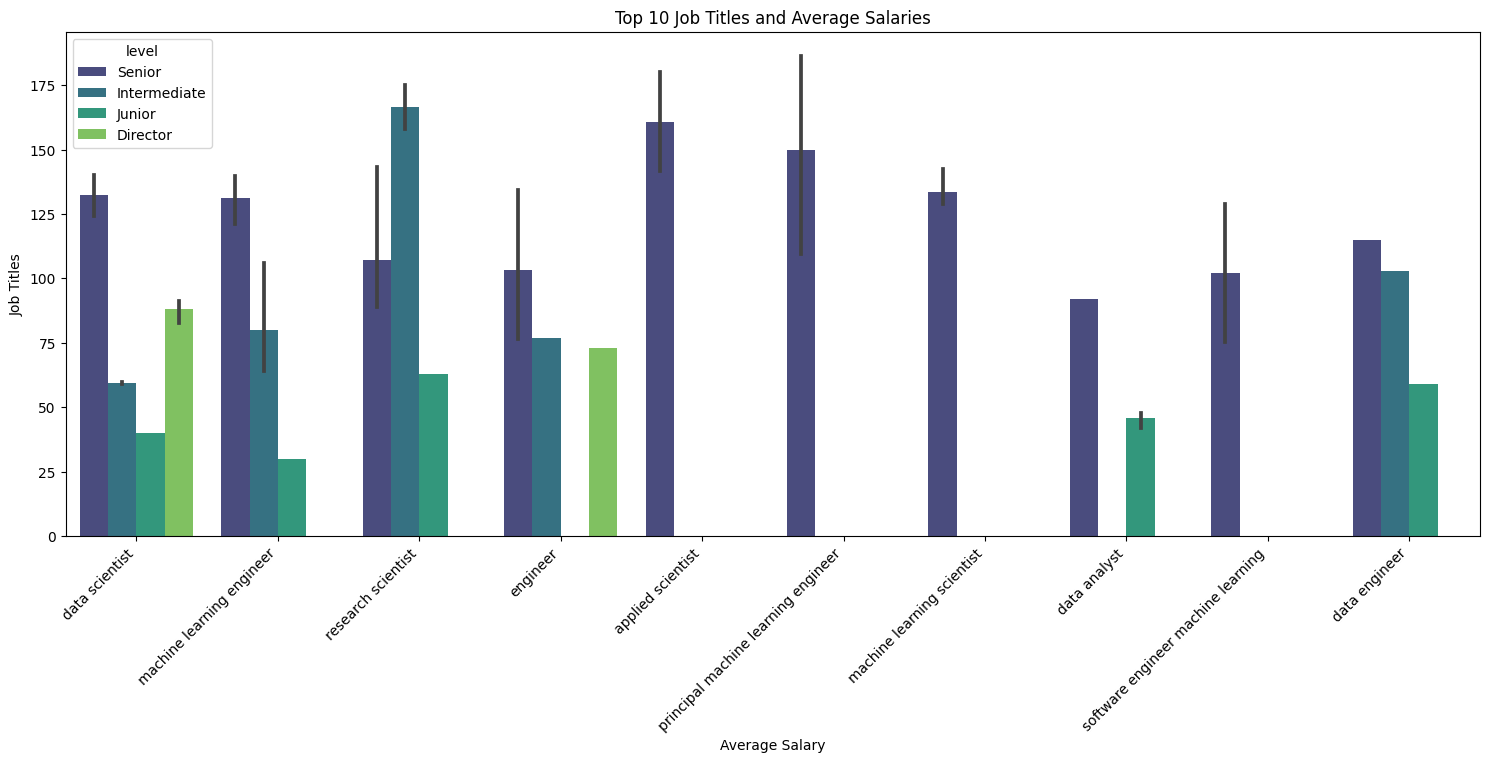

In [ ]:
# Get the top ten job titles based on their counts
top_ten_jobs = df4['Title'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top ten job titles
filtered_df = df4[df4['Title'].isin(top_ten_jobs)]

# Create the Seaborn plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Title', y='Salary', hue='level',  data= filtered_df, palette='viridis')
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Top 10 Job Titles and Average Salaries')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df.to_csv('jobs.csv', index=False)